In [1]:
# Import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper')

# Hands-On Activity 7.2: Sampling the uniform

## Objectives

+ Demonstrate how we can sample from the uniform distribution using PRNGs.


## Readings

+ These notes.

## Sampling from the uniform distribution

If we have a PRNG that samples between zero and a big integer, say $m$, we can create a generator that samples from the uniform distribution.
If $d$ is the sample from the PRNG, then
$$
x = \frac{d}{m},
$$
is approximately uniformly distributed.
Let's experiment with this idea.

In [2]:
# The maximum integer
m = 6012119

def lcg(x, a=123456, b=978564, m=6012119):
    """
    Arguments:
        x     -   The previous number in the sequence.
        a     -   A big integer.
        b     -   Another big integer.
        m     -   Another big integer.
    """
    return (a * x + b) % m

# First a uniform random generator based on lcg
lcg_seed = 123456 # A seed of lcg
lcg_state = lcg_seed # Internal state of lcg
def unif_lcg():
    """
    Samples from the uniform using LCG.
    """
    global lcg_state
    lcg_state = lcg(lcg_state)
    return lcg_state / (1. * m) # The 1. in the denominator ensures
                                # that the division is done in floating point arithmetic
print('LCG Uniform Samples:')
for _ in range(5):
    print(unif_lcg())

# And let's also do it with Mersenne Twister from numpy
np.random.seed(123456)
def unif_mt():
    """
    Samples from the uniform using the MT.
    """
    return np.random.randint(0, m) / (1. * m)
print('\nMT Uniform Samples:')
for _ in range(5):
    print(unif_mt())

LCG Uniform Samples:
0.27292124457283695
0.9279352255003602
0.3339646138075444
0.09812746554085174
0.5871510527319902

MT Uniform Samples:
0.011933396527913037
0.8868237638010824
0.5074856302744507
0.5300725085448242
0.5373225313737137


Which one of the two is better? There are many statistical tests that we would like our uniform random number generator to go through. First (and most importantly) the empirical histograms of the generated numbers should be uniform. Let's test this.

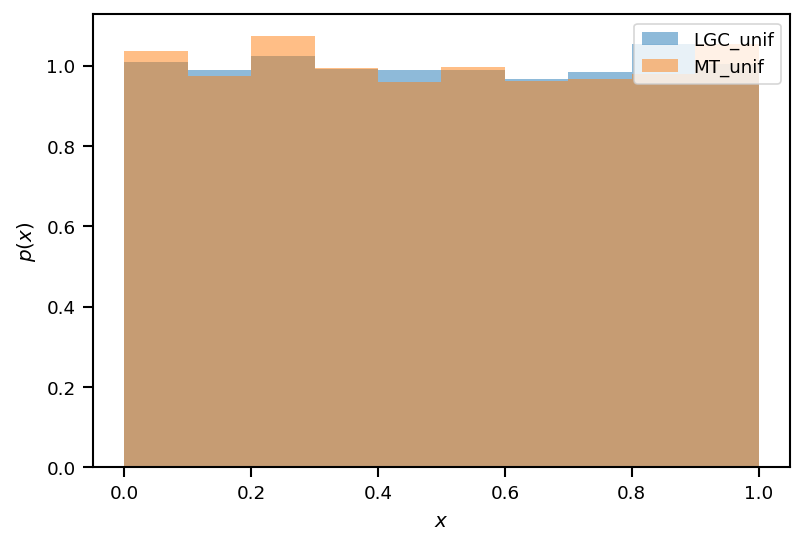

In [8]:
# How many numbers to sample:
N = 10000
lcg_X = [unif_lcg() for _ in range(N)]
mt_X = [unif_mt() for _ in range(N)]
# Plot the histograms
fig, ax = plt.subplots(dpi=150)
ax.hist(lcg_X, density=True, alpha=0.5, label='LGC_unif')
ax.hist(mt_X, density=True, alpha=0.5, label='MT_unif')
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
plt.legend(loc='best');

This was a rough visual test.
We can do better.
We can compare the [empirical CDF](https://en.wikipedia.org/wiki/Empirical_distribution_function) of each one of these algorithms with the ideal CDF, i.e., that of a real uniform.
But what is the empirical CDF of a bunch of samples $x_{1:N}$?
It is defined as follows:
$$
\hat{F}_N(x) = \frac{\text{number of elements in sample}\;\le x}{N} = \frac{1}{N}\sum_{n=1}^N 1_{(-\infty, x_i]}(x).
$$
We are going to explain in what sense the empirical CDF approximates the true PDF in Lecture 9.
For now, let's just use it:

In [9]:
def ecdf(x):
    """
    The empirical distribution function of scalar samples.
    
    From: https://stackoverflow.com/questions/15792552/numpy-scipy-equivalent-of-r-ecdfxx-function
    """
    xs = np.sort(x)
    ys = np.arange(1, len(xs)+1)/float(len(xs))
    return xs, ys

Now, let's plot the empirical CDF of each of the samples and plot it against $F(x) = x$ (the true CDF of the uniform).

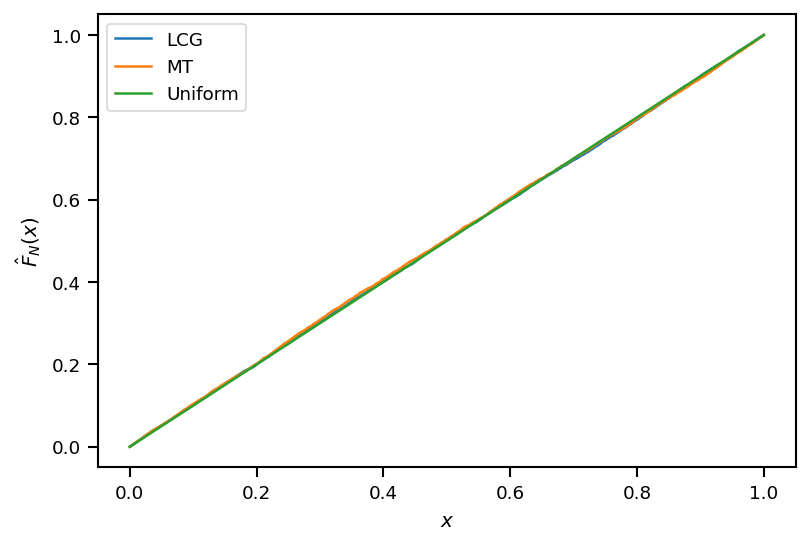

In [10]:
fig, ax = plt.subplots(dpi=150)
ax.plot(*ecdf(lcg_X), label='LCG')
ax.plot(*ecdf(mt_X), label='MT')
ax.plot(np.linspace(0, 1), np.linspace(0, 1), label='Uniform')
ax.set_xlabel('$x$')
ax.set_ylabel('$\hat{F}_N(x)$')
plt.legend(loc='best');

This is still visual. The [Kolmogorov-Smirnov test](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test) summarizes calculate a distance between the empirical distribution and the ideal one.
It is defined as follows:
$$
D_N = \sup_x |F(x) - \hat{F}_N(x)|,
$$
where (if you don't know what it is) you can think of the supremum ($\sup$) as just the maximum.
In other words, $D_N$ is the maximum absolute difference between $F(x)$ and $\hat{F}_N(x)$.
Let's see what we get for LCG and MT compared to the uniform:

In [11]:
import scipy.stats as st
D_lcg, p_val_lcg = st.kstest(lcg_X, 'uniform')
D_mt, p_val_mt = st.kstest(mt_X, 'uniform')
print('KS statistic for LCG vs uniform: {0:1.2f}'.format(D_lcg))
print('KS statistic for MT vs uniform: {0:1.2f}'.format(D_mt))

KS statistic for LCG vs uniform: 0.01
KS statistic for MT vs uniform: 0.01


### Question
+ Hmm, we probably need to increase the number of samples to observe this statistic better. Increase $N$ from 100 to $1,000$ and then to $10,000$. How do the distributions look like now?

+ A second thing that we would like to test is whether or not consecutive numbers are all independent (Idependent identically distributed). Unfortunately, we need more theory than we know to do this.

+ For future reference, note that you should not really use ``unif_mt`` to generate uniform random numbers. Numpy already implements this in ``numpy.random.rand``. We provide an example right below. 

In [12]:
# Generate some random numbers with numpy's unif_mt:
X = np.random.rand(10)
print(X)

[0.34959464 0.31147955 0.82987991 0.84979905 0.24884338 0.89250797
 0.90049092 0.05043642 0.9870106  0.78453556]
